In [1]:
# import dependecies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from config import weather_key
from scipy.stats import linregress
from citipy import citipy
import json

In [2]:
# save config information
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# building partial query url
query_url = f'{url}appid={weather_key}&units={units}&q='

In [3]:
# range of latitude and longitude
lat = (-90,90)
lng = (-180,180)

# define count to pass through
count = 0
set_counter = 0

In [4]:
# list to hold cities and coordinates
cities = []
latutides_longitudes = []


# using uniform distribution, create a set of random latitudes and longitudes
latitudes = np.random.uniform(low=-90.0000, high=90.0000, size=1500)
longitudes = np.random.uniform(low=-180.0000, high=180.0000, size=1500)
latitudes_longitudes = zip(latitudes, longitudes)

# identify nearest city for each coordinates combination
for lat_lng in latitudes_longitudes:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities: # only add to list if the city found is unique
        cities.append(city)
        
#print(cities)
#len(cities)

# get a glimpse of the json print for df variable creation
response = requests.get(query_url+city).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 94
    },
    "cod": 200,
    "coord": {
        "lat": 55.1153,
        "lon": 83.9059
    },
    "dt": 1655555395,
    "id": 1506254,
    "main": {
        "feels_like": 60.87,
        "grnd_level": 975,
        "humidity": 88,
        "pressure": 1003,
        "sea_level": 1003,
        "temp": 60.94,
        "temp_max": 60.94,
        "temp_min": 60.94
    },
    "name": "Gornyy",
    "rain": {
        "1h": 0.28
    },
    "sys": {
        "country": "RU",
        "sunrise": 1655502228,
        "sunset": 1655564825
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 253,
        "gust": 13.58,
        "speed": 8.66
    }
}


#  API calls

In [5]:
# set empty lists of variables for df creation 
info = 0
citi = []
latitudes = []
longitudes = []
cloudiness = []
humidity = []
temperatures = []
windspeed = []
country = []
city_name = []
date = []


print('Beginning data retrieval\n----------------------------')
# loop through url info to generate dataframe columns
for city in cities:
    
    # create search query
    response = requests.get(query_url + city).json()
    try:
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        temperatures.append(response['main']['temp'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    
        if count < 50: 
            count = 1
            set_counter += 1
            citi.append(city)
        else:
            count = 1
            set_counter += 1
        print(f'Processing record {count} for set {set_counter} | {city}')
    except Exception:
        print(f'City not found. Skipping...')
print('----------\nData retrieval complete:)\n-----------')

Beginning data retrieval
----------------------------
Processing record 1 for set 1 | barrow
Processing record 1 for set 2 | cape town
Processing record 1 for set 3 | liaoyang
Processing record 1 for set 4 | riyadh
City not found. Skipping...
Processing record 1 for set 5 | ushuaia
Processing record 1 for set 6 | kenai
Processing record 1 for set 7 | lompoc
Processing record 1 for set 8 | maniitsoq
Processing record 1 for set 9 | rikitea
Processing record 1 for set 10 | omsukchan
Processing record 1 for set 11 | hobart
Processing record 1 for set 12 | ilulissat
Processing record 1 for set 13 | iquitos
Processing record 1 for set 14 | touros
Processing record 1 for set 15 | vaini
Processing record 1 for set 16 | porbandar
Processing record 1 for set 17 | busselton
Processing record 1 for set 18 | tasiilaq
Processing record 1 for set 19 | clyde river
Processing record 1 for set 20 | tecpan
Processing record 1 for set 21 | storsteinnes
Processing record 1 for set 22 | kruisfontein
Process

Processing record 1 for set 181 | fare
Processing record 1 for set 182 | bethel
Processing record 1 for set 183 | linqiong
City not found. Skipping...
Processing record 1 for set 184 | luderitz
Processing record 1 for set 185 | vardo
Processing record 1 for set 186 | soc trang
Processing record 1 for set 187 | santa rosa
Processing record 1 for set 188 | lerwick
Processing record 1 for set 189 | mehamn
Processing record 1 for set 190 | solnechnyy
Processing record 1 for set 191 | guerrero negro
Processing record 1 for set 192 | mahebourg
Processing record 1 for set 193 | port hardy
Processing record 1 for set 194 | northam
Processing record 1 for set 195 | winnemucca
Processing record 1 for set 196 | hithadhoo
Processing record 1 for set 197 | esperance
Processing record 1 for set 198 | thompson
Processing record 1 for set 199 | iwanai
Processing record 1 for set 200 | almaznyy
Processing record 1 for set 201 | fujin
Processing record 1 for set 202 | alofi
Processing record 1 for set 2

Processing record 1 for set 359 | agadir
Processing record 1 for set 360 | ahipara
Processing record 1 for set 361 | oksfjord
City not found. Skipping...
Processing record 1 for set 362 | verkhnevilyuysk
Processing record 1 for set 363 | marawi
Processing record 1 for set 364 | angoche
Processing record 1 for set 365 | sakakah
Processing record 1 for set 366 | saint-marc-des-carrieres
Processing record 1 for set 367 | tarko-sale
Processing record 1 for set 368 | eyl
Processing record 1 for set 369 | san juan
Processing record 1 for set 370 | aklavik
Processing record 1 for set 371 | urengoy
Processing record 1 for set 372 | suchil
Processing record 1 for set 373 | polson
Processing record 1 for set 374 | plumlov
Processing record 1 for set 375 | soyo
Processing record 1 for set 376 | pokhara
Processing record 1 for set 377 | hovd
Processing record 1 for set 378 | alfred
Processing record 1 for set 379 | inuvik
Processing record 1 for set 380 | nara
Processing record 1 for set 381 | roe

Processing record 1 for set 538 | jiangkou
City not found. Skipping...
Processing record 1 for set 539 | cayenne
Processing record 1 for set 540 | syracuse
Processing record 1 for set 541 | mingaora
Processing record 1 for set 542 | pundaguitan
Processing record 1 for set 543 | tual
Processing record 1 for set 544 | bagdarin
Processing record 1 for set 545 | roswell
Processing record 1 for set 546 | magnitka
City not found. Skipping...
Processing record 1 for set 547 | tomatlan
Processing record 1 for set 548 | garowe
Processing record 1 for set 549 | diu
Processing record 1 for set 550 | waitati
Processing record 1 for set 551 | vad
Processing record 1 for set 552 | stepnyak
Processing record 1 for set 553 | husavik
Processing record 1 for set 554 | teya
Processing record 1 for set 555 | batemans bay
Processing record 1 for set 556 | gornyy
----------
Data retrieval complete:)
-----------


## Dataframe creation and cleaning

In [6]:
# create dictionary 
info_df = pd.DataFrame({
    'City': citi,
    'Country':country,
    'Latitude':latitudes,
    'Longitude':longitudes,
    'Humidity':humidity,
    'Windspeed':windspeed,
    'Cloudiness':cloudiness,
    'Temperatures':temperatures,
    'Date':date
})
info_df.head()

# save the csv
#info_df.to_csv('weather_df', encoding='utf-8',index=False)

,City,Country,Latitude,Longitude,Humidity,Windspeed,Cloudiness,Temperatures,Date
0,barrow,US,71.2906,-156.7887,93,10.36,100,30.22,1655555400
1,cape town,ZA,-33.9258,18.4232,64,21.85,40,62.76,1655555169
2,liaoyang,CN,41.2719,123.1731,84,3.62,98,71.92,1655555401
3,riyadh,SA,24.6877,46.7219,4,21.21,0,111.34,1655555237
4,ushuaia,AR,-54.8000,-68.3000,86,16.11,75,29.86,1655555402


In [7]:
# get summary statistics
info_df.describe()

,Latitude,Longitude,Humidity,Windspeed,Cloudiness,Temperatures,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,19.397378,16.862952,67.041367,8.365558,57.007194,68.163399,1.655555e+09
std,33.526235,91.234090,23.129718,5.983160,40.501495,15.729486,6.817055e+01
min,-54.800000,-179.166700,1.000000,0.000000,0.000000,28.510000,1.655555e+09
25%,-8.624450,-65.054450,54.000000,3.960000,11.000000,56.027500,1.655555e+09
50%,22.180350,19.234450,72.000000,6.910000,70.500000,71.185000,1.655555e+09
75%,47.967425,100.324825,85.000000,11.500000,100.000000,79.577500,1.655556e+09
max,78.218600,179.316700,100.000000,40.290000,100.000000,114.370000,1.655556e+09


In [8]:
# remove cities with humidity >100
# info_df['Humidity'].value_counts()
humidity_check = info_df.sort_values('Humidity', ascending=False)
print('No values >100 in humidity, thus plot!')
humidity_check.head()

No values >100 in humidity, thus plot!


,City,Country,Latitude,Longitude,Humidity,Windspeed,Cloudiness,Temperatures,Date
12,iquitos,PE,-3.7481,-73.2472,100,2.30,75,75.24,1655555404
365,saint-marc-des-carrieres,CA,46.6834,-72.0491,100,2.30,100,48.27,1655555514
265,fort nelson,CA,58.8053,-122.7002,100,2.30,100,45.99,1655555483
425,inirida,CO,3.8653,-67.9239,100,1.19,100,71.73,1655555533
501,sola,VU,-13.8833,167.5500,100,0.00,100,74.07,1655555558


In [9]:
info_df.dtypes

City             object
Country          object
Latitude        float64
Longitude       float64
Humidity          int64
Windspeed       float64
Cloudiness        int64
Temperatures    float64
Date              int64
dtype: object

## Plotting scatterplots

<function matplotlib.pyplot.show(close=None, block=None)>

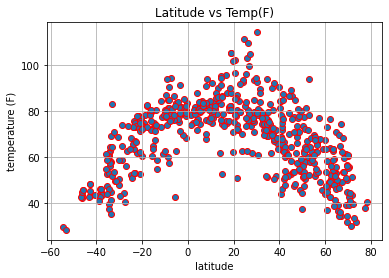

In [10]:
# create temp vs lat scatter
y1= info_df['Temperatures']
x1= info_df['Latitude']
plt.scatter(x1,y1, marker='o',edgecolors='red')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('temperature (F)')
plt.title('Latitude vs Temp(F)')
plt.savefig('temp_vs_lat.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

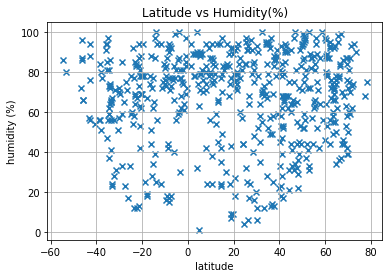

In [11]:
# create humidity vs lat scatter
x2= info_df['Latitude']
y2= info_df['Humidity']
plt.scatter(x2,y2, marker='x')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('humidity (%)')
plt.title('Latitude vs Humidity(%)')
plt.savefig('hum_vs_lat.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

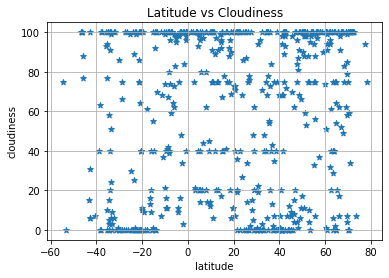

In [12]:
# create cloudiness vs lat scatter
x3= info_df['Latitude']
y3= info_df['Cloudiness']
plt.scatter(x3,y3, marker='*')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.title('Latitude vs Cloudiness')
plt.savefig('cloud_vs_lat.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

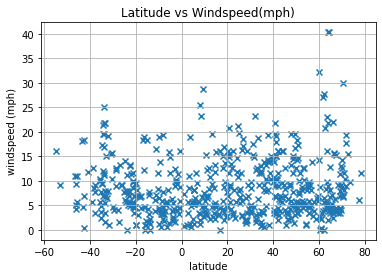

In [13]:
# create windspeed vs lat scatter
x4= info_df['Latitude']
y4= info_df['Windspeed']
plt.scatter(x4,y4, marker='x')
plt.grid()
plt.xlabel('latitude')
plt.ylabel('windspeed (mph)')
plt.title('Latitude vs Windspeed(mph)')
plt.savefig('wind_vs_lat.png')
plt.show

## Linear Regression

### Northern Hemisphere

In [14]:
# using original dataframe create a northern hemisphere dataframe 
# in this case latitude will be > 0
# equator = 0
northern_hem_df = info_df[info_df['Latitude']>0]
northern_hem_df.head()
# save csv
northern_hem_df.to_csv('northern hemisphere df', encoding='utf-8', index=False)

The r-squared is: 0.5003404960949759


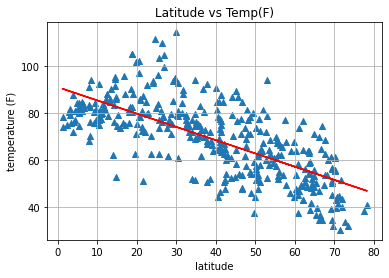

In [15]:
# linregress temp vs lat on scatter
yn1= northern_hem_df['Temperatures']
xn1= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn1, yn1)
regress_values = xn1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn1,yn1, marker='^')
plt.plot(xn1,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('temperature (F)')
plt.title('Latitude vs Temp(F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regNtemp_vs_lat.png')
plt.show()

The r-squared is: 2.4293800455556472e-05


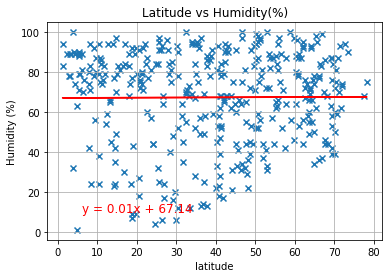

In [16]:
# linregress humidity vs lat on scatter
yn2= northern_hem_df['Humidity']
xn2= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn2, yn2)
regress_values = xn1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn2,yn2, marker='x')
plt.plot(xn2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity(%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regNhum_vs_lat.png')
plt.show()

The r-squared is: 0.0028928147827867096


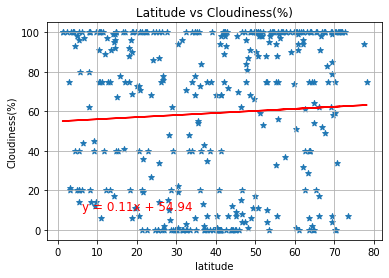

In [17]:
# linregress cloudiness vs lat on scatter
yn3= northern_hem_df['Cloudiness']
xn3= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn3, yn3)
regress_values = xn3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn3,yn3, marker='*')
plt.plot(xn3,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Latitude vs Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regNcloud_vs_lat.png')
plt.show()

The r-squared is: 0.01017742241250524


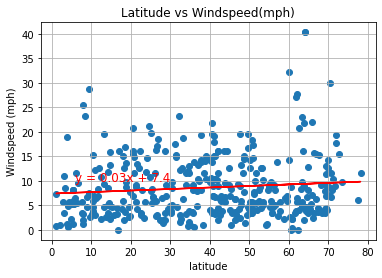

In [18]:
# linregress windspeed vs lat on scatter
yn4= northern_hem_df['Windspeed']
xn4= northern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xn4, yn4)
regress_values = xn4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xn4,yn4, marker='o')
plt.plot(xn4,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Latitude vs Windspeed(mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regNwind_vs_lat.png')
plt.show()

### Southern Hemisphere

In [19]:
# using original dataframe create a southern hemisphere dataframe 
# in this case latitude will be < 0
# equator = 0
southern_hem_df = info_df[info_df['Latitude']<0]
southern_hem_df.head()
southern_hem_df.to_csv('southern hemisphere df', encoding='utf-8', index=False)

The r-squared is: 0.6269426658529115


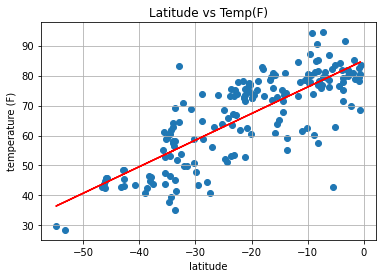

In [21]:
# linregress temp vs lat on scatter
ys1= southern_hem_df['Temperatures']
xs1= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs1, ys1)
regress_values = xs1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs1,ys1, marker='o')
plt.plot(xs1,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('temperature (F)')
plt.title('Latitude vs Temp(F)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regStemp_vs_lat.png')
plt.show()

The r-squared is: 0.0006118744404919531


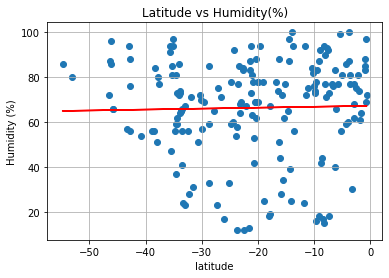

In [22]:
# linregress humidity vs lat on scatter
ys2= southern_hem_df['Humidity']
xs2= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs2, ys2)
regress_values = xs2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs2,ys2, marker='o')
plt.plot(xs2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs Humidity(%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regShum_vs_lat.png')
plt.show()

The r-squared is: 0.03373226964721631


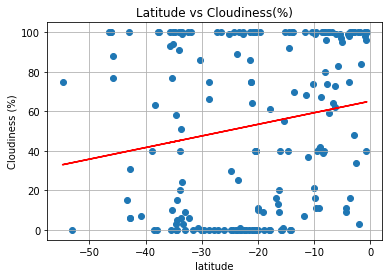

In [23]:
# linregress Cloudiness vs lat on scatter
ys3= southern_hem_df['Cloudiness']
xs3= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs3, ys3)
regress_values = xs3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs3,ys3, marker='o')
plt.plot(xs3,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs Cloudiness(%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regScloud_vs_lat.png')
plt.show()

The r-squared is: 0.07458931353356939


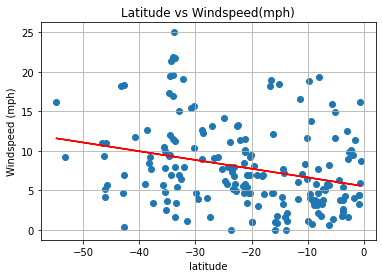

In [24]:
# linregress windspeed vs lat on scatter
ys4= southern_hem_df['Windspeed']
xs4= southern_hem_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xs4, ys4)
regress_values = xs4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xs4,ys4, marker='o')
plt.plot(xs4,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.grid()
plt.xlabel('latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Latitude vs Windspeed(mph)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('regSwind_vs_lat.png')
plt.show()